# Imports

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

#Sklearn tools
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#3 classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [42]:
df=pd.read_csv("crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Check Data Information

In [43]:
#Explore and understand the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [9]:
#row & columns
print(df.shape)

(2200, 8)


In [10]:
#summary statistics
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [11]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

# Check Missing Values

In [8]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


# Check Duplicates

In [9]:
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool
0


# Encoding

In [10]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

# Exploratory Data Analysis

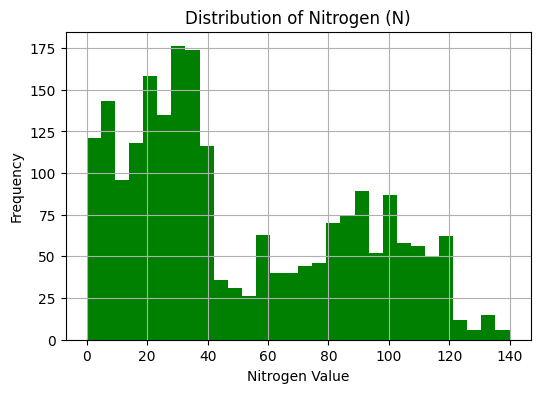

In [52]:
import matplotlib.pyplot as plt

df['N'].hist(bins=30, figsize=(6,4), color='green')
plt.title("Distribution of Nitrogen (N)")
plt.xlabel("Nitrogen Value")
plt.ylabel("Frequency")
plt.show()

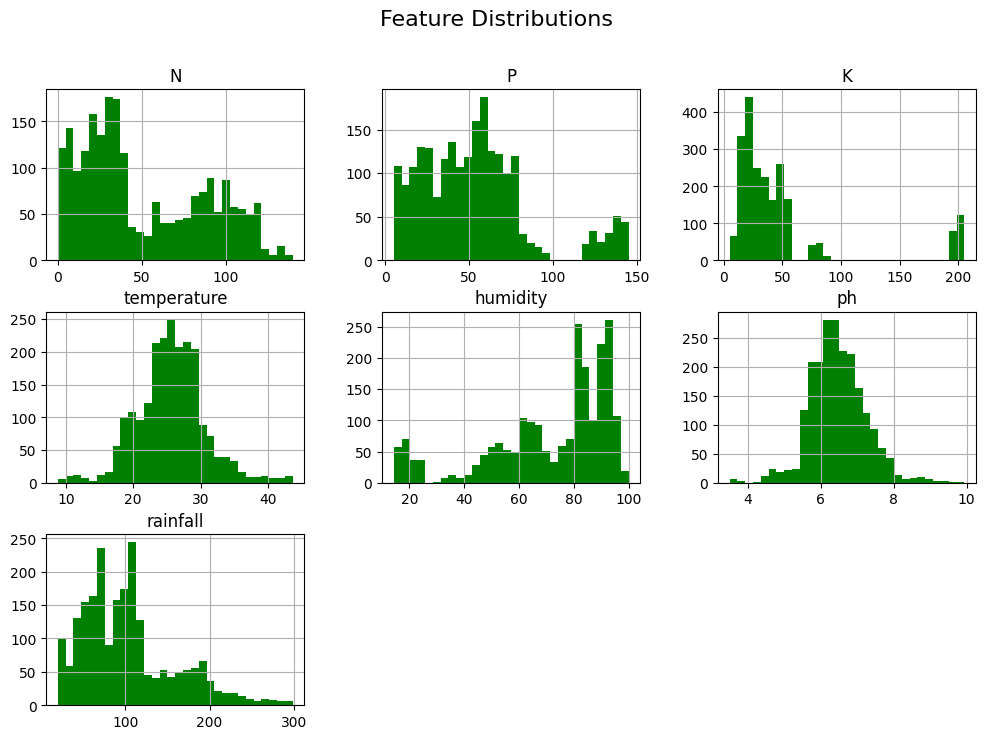

In [12]:
#univariate Analysis
df.hist(figsize=(12,8), bins=30, color="green")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

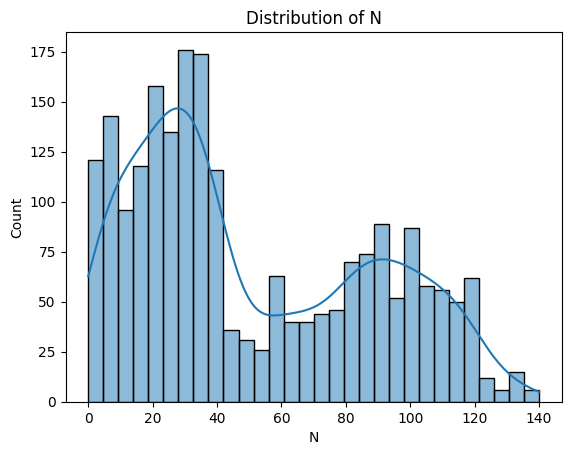

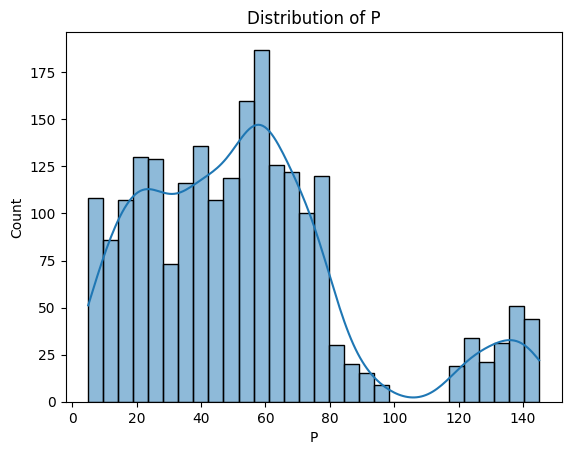

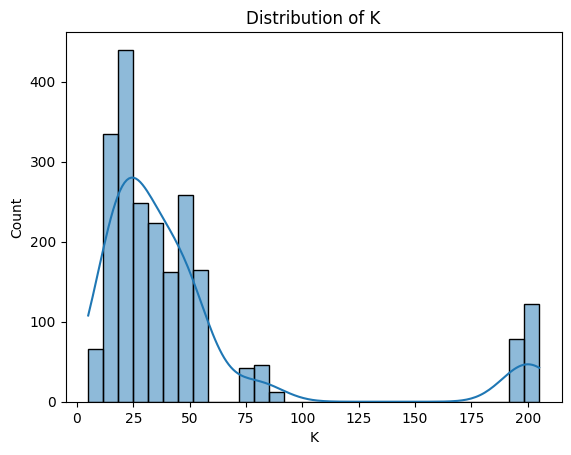

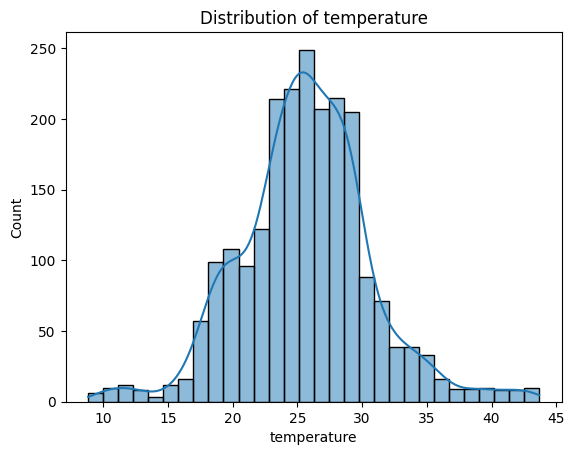

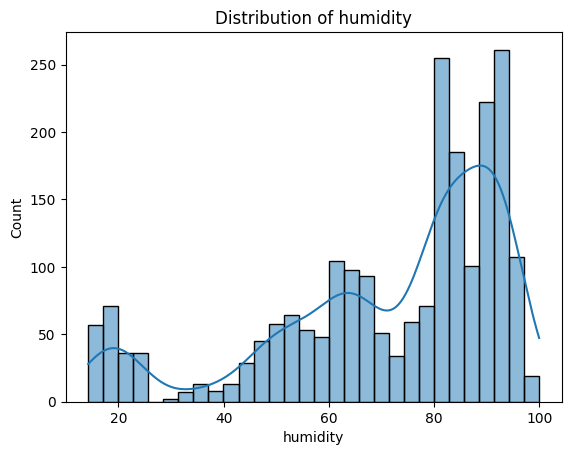

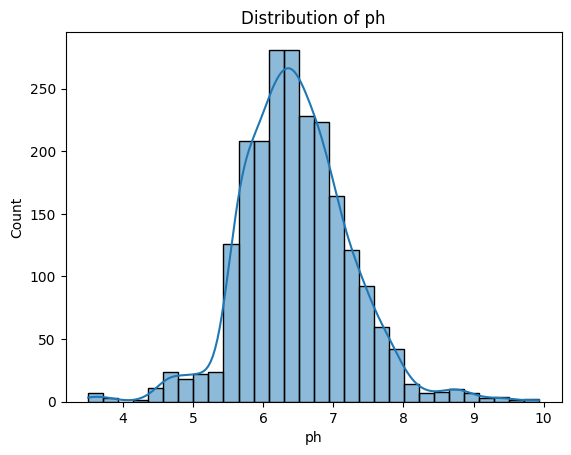

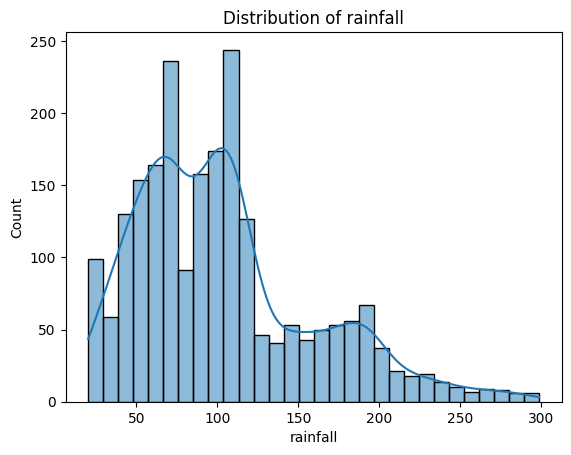

In [14]:
for col in ["N","P","K","temperature","humidity","ph","rainfall"]:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

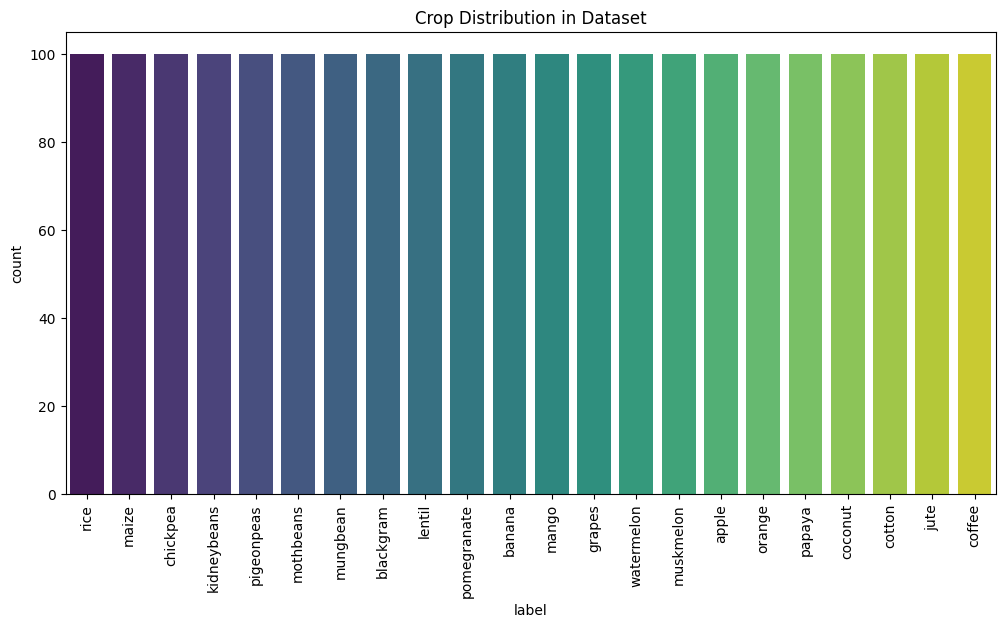

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x="label", hue="label", data=df, order=df['label'].value_counts().index, palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.title("Crop Distribution in Dataset")
plt.show()

# Bivariate Analysis

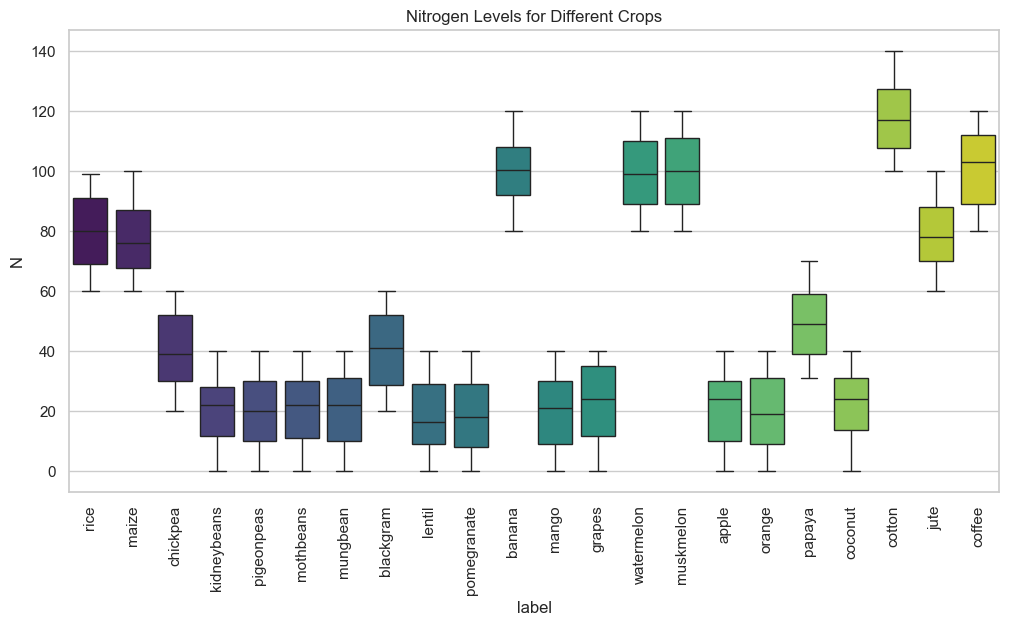

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x="label", y="N", hue="label", data=df, palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.title("Nitrogen Levels for Different Crops")
plt.show()

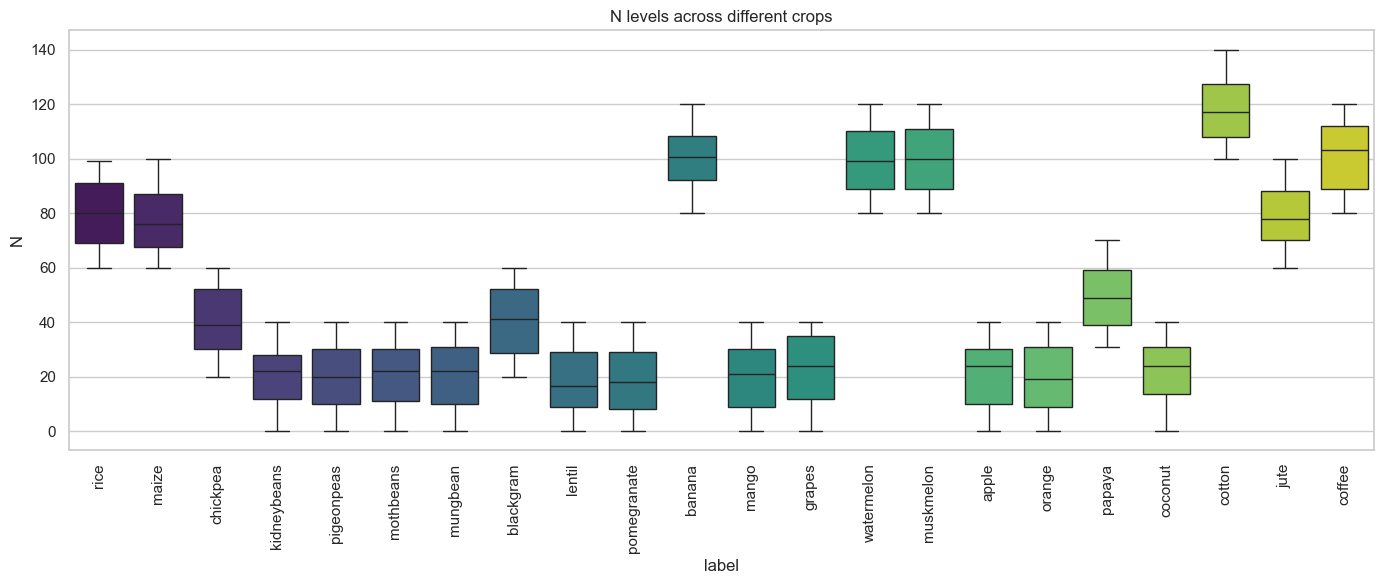

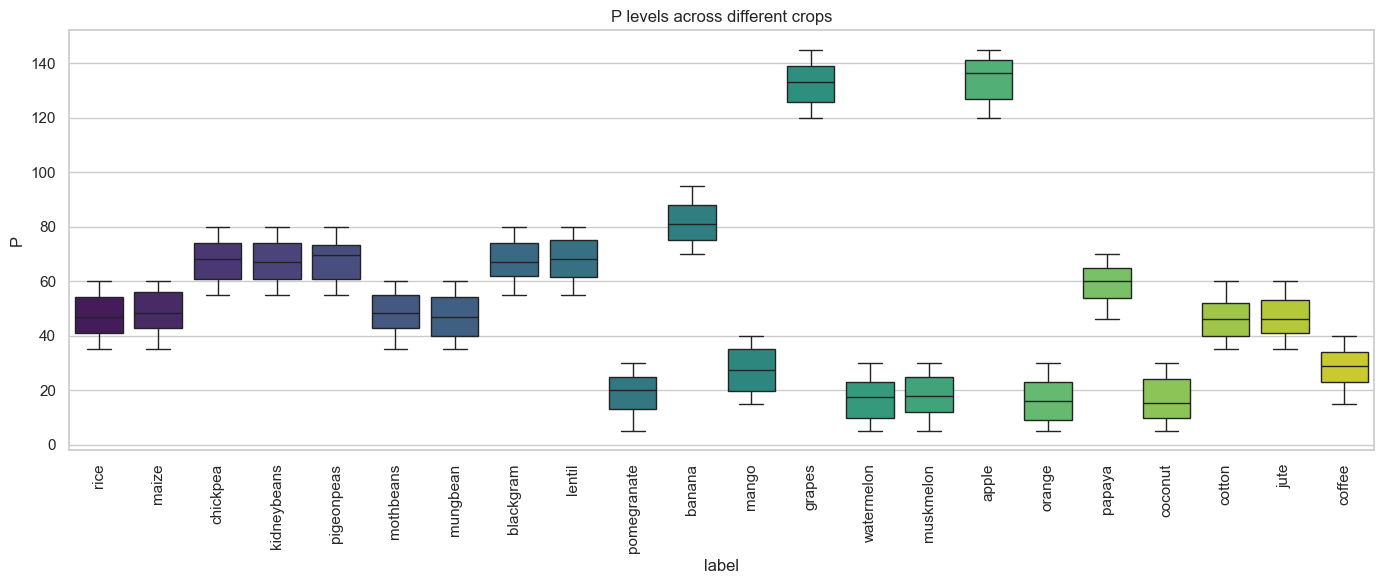

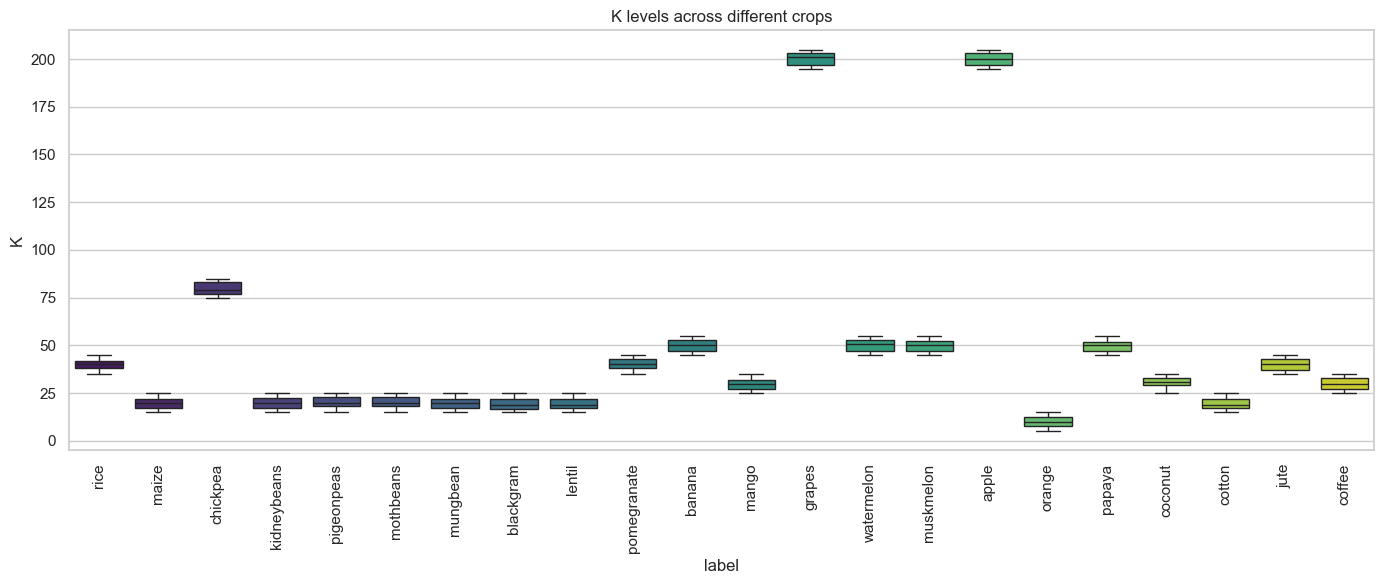

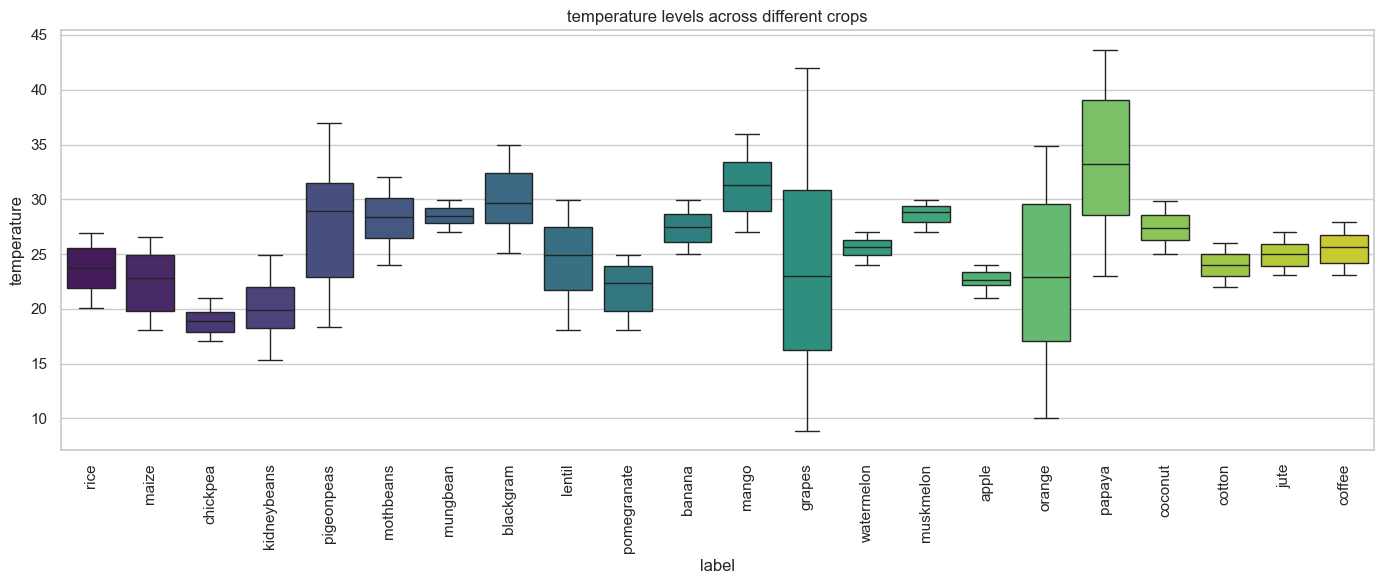

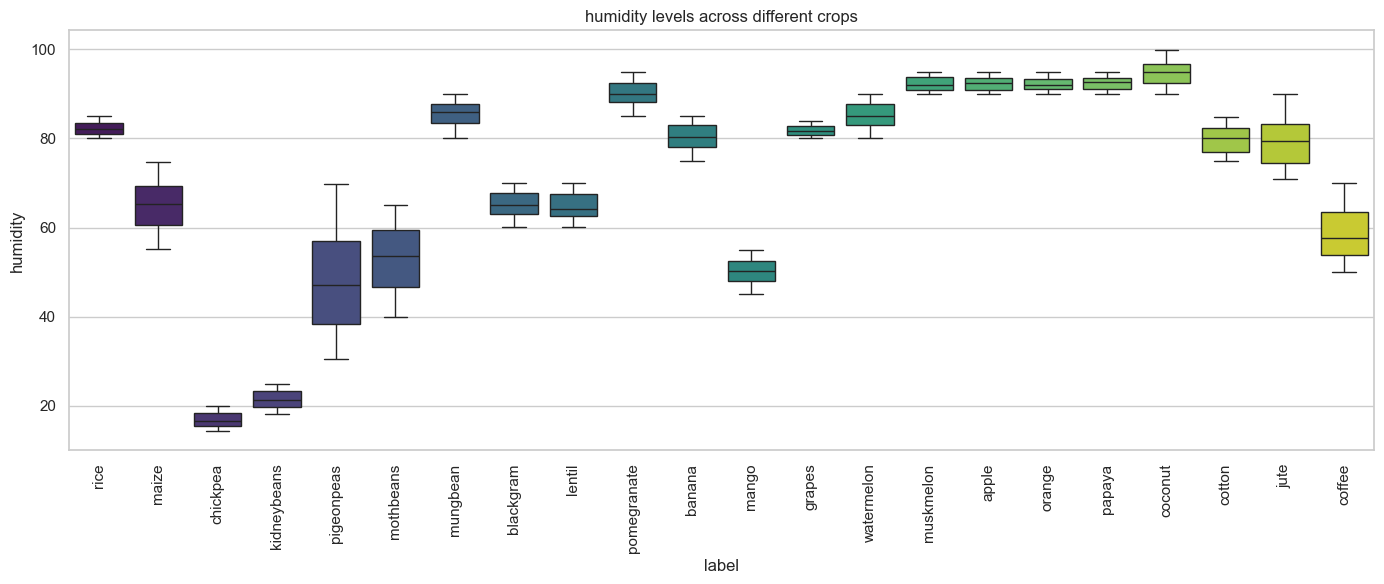

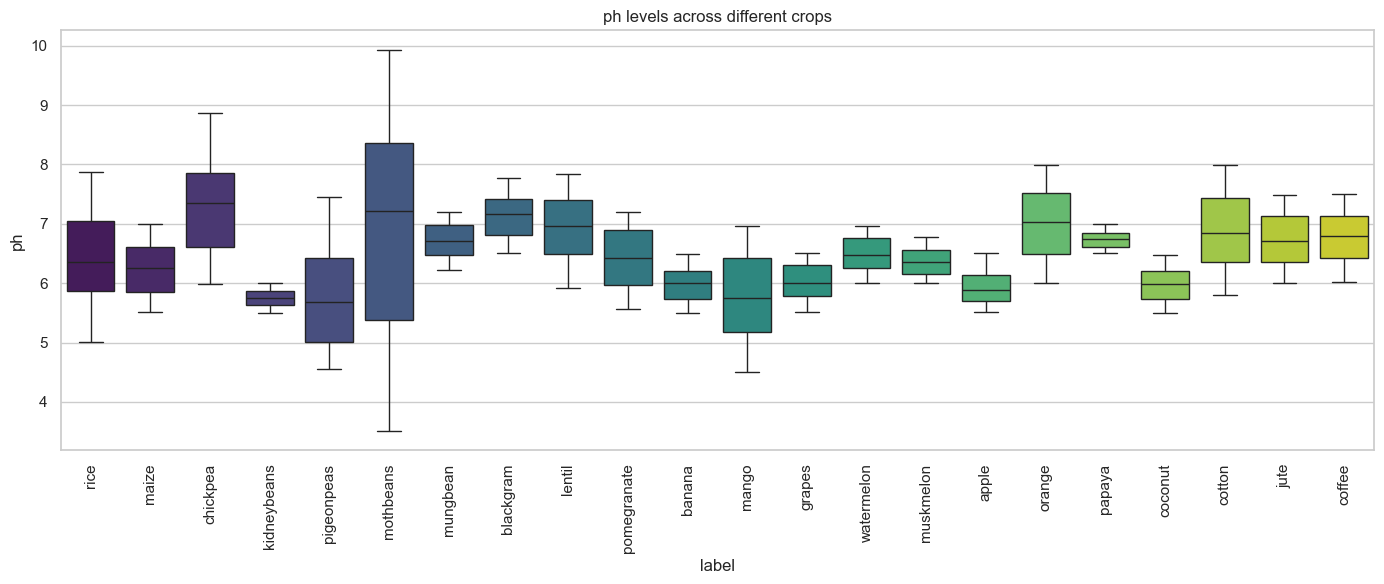

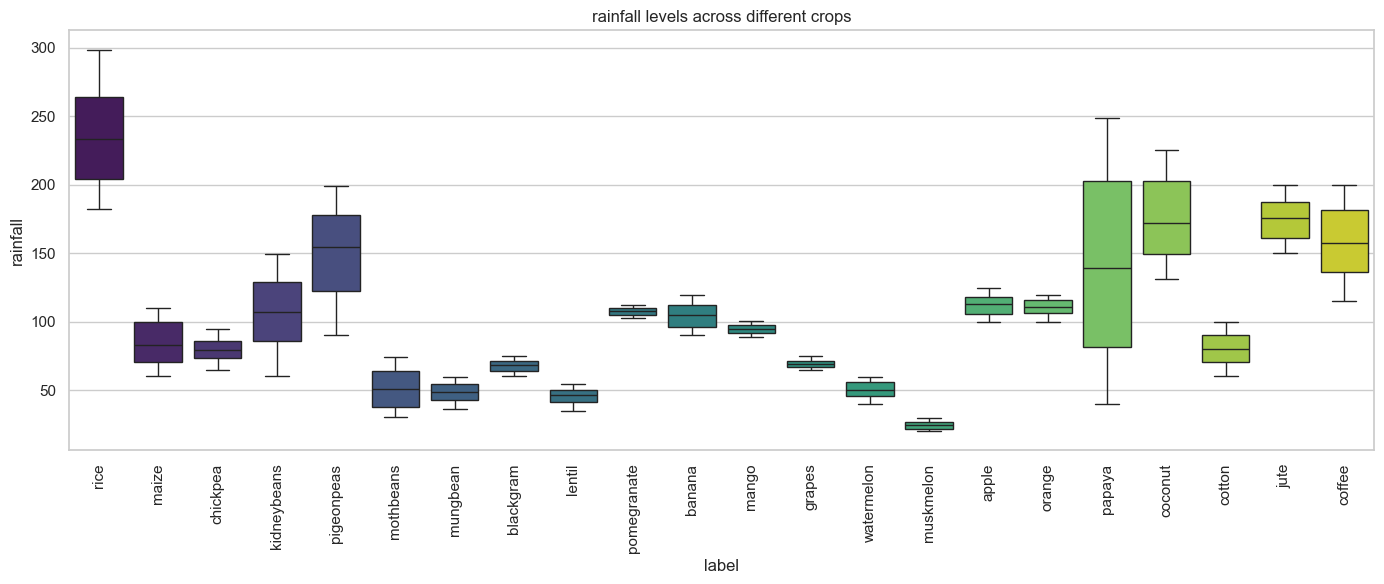

In [59]:
features = ["N","P","K","temperature","humidity","ph","rainfall"]

for col in features:
    plt.figure(figsize=(14,6))
    sns.boxplot(x="label", y=col, hue="label", data=df, palette="viridis", legend=False)
    plt.xticks(rotation=90)
    plt.title(f"{col} levels across different crops")
    plt.tight_layout()
    plt.show()

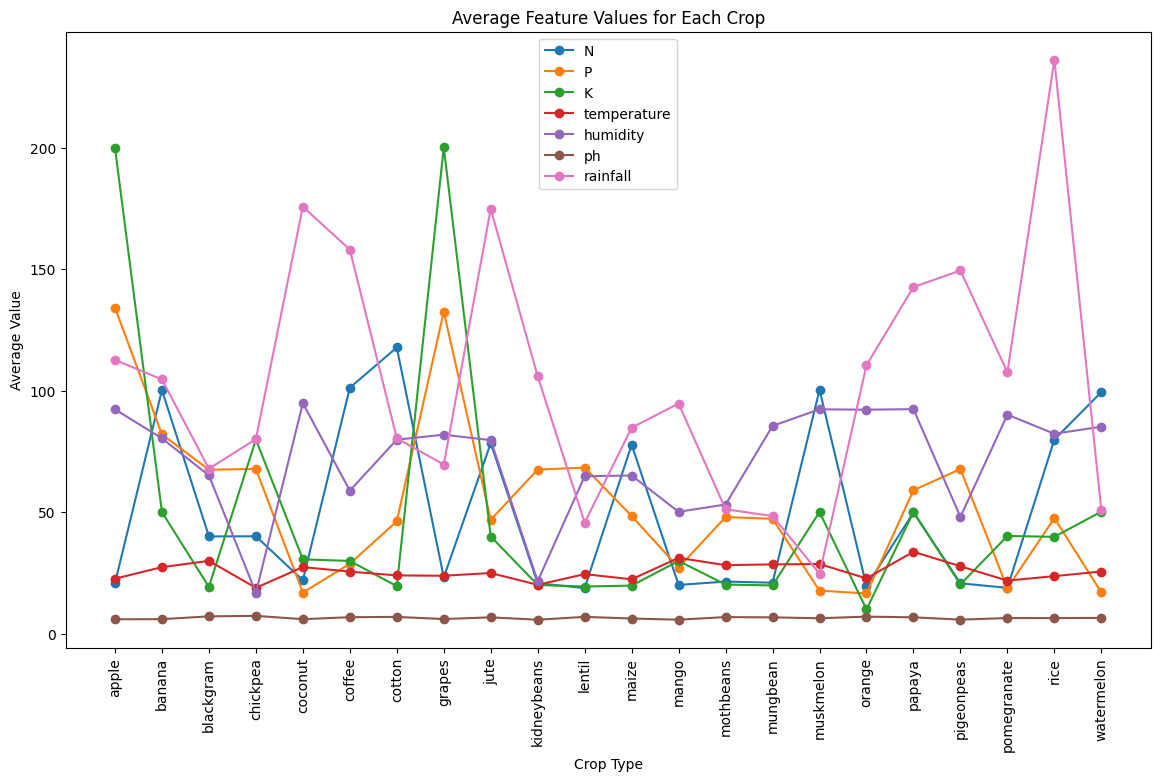

In [23]:
plt.figure(figsize=(14,8))

# Take mean of all numeric columns grouped by crop
avg_features = df.groupby("label")[["N","P","K","temperature","humidity","ph","rainfall"]].mean()

# Plot each feature as a line
for col in avg_features.columns:
    plt.plot(avg_features.index, avg_features[col], marker="o", label=col)

plt.xticks(rotation=90)
plt.xlabel("Crop Type")
plt.ylabel("Average Value")
plt.title("Average Feature Values for Each Crop")
plt.legend()
plt.show()

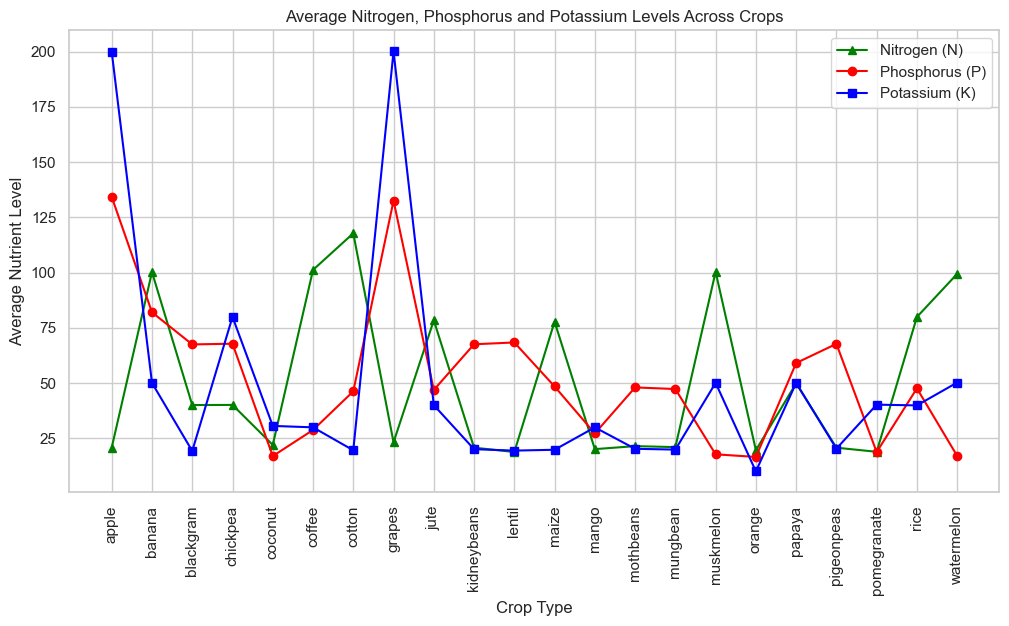

In [60]:
#Bivariate Analysis
plt.figure(figsize=(12,6))

# Average values for each crop
avg_N = df.groupby("label")["N"].mean()
avg_P = df.groupby("label")["P"].mean()
avg_K = df.groupby("label")["K"].mean()

# Plot Nitrogen
plt.plot(avg_N.index, avg_N.values, marker="^", label="Nitrogen (N)", color="green")

# Plot Phosphorus
plt.plot(avg_P.index, avg_P.values, marker="o", label="Phosphorus (P)", color="red")

# Plot Potassium
plt.plot(avg_K.index, avg_K.values, marker="s", label="Potassium (K)", color="blue")

plt.xticks(rotation=90)
plt.xlabel("Crop Type")
plt.ylabel("Average Nutrient Level")
plt.title("Average Nitrogen, Phosphorus and Potassium Levels Across Crops")
plt.legend()
plt.show()

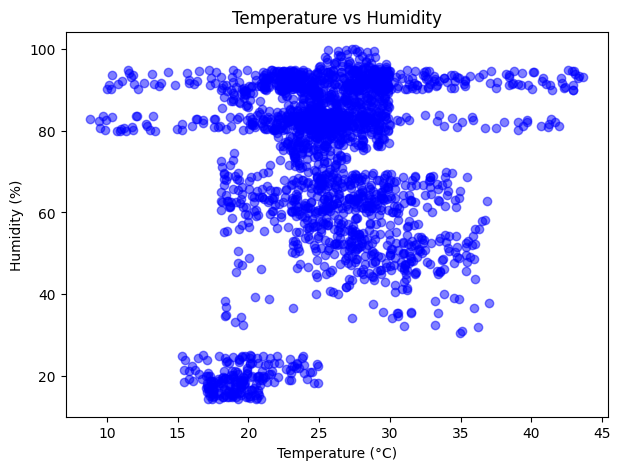

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(df['temperature'], df['humidity'], c='blue', alpha=0.5)
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.show()

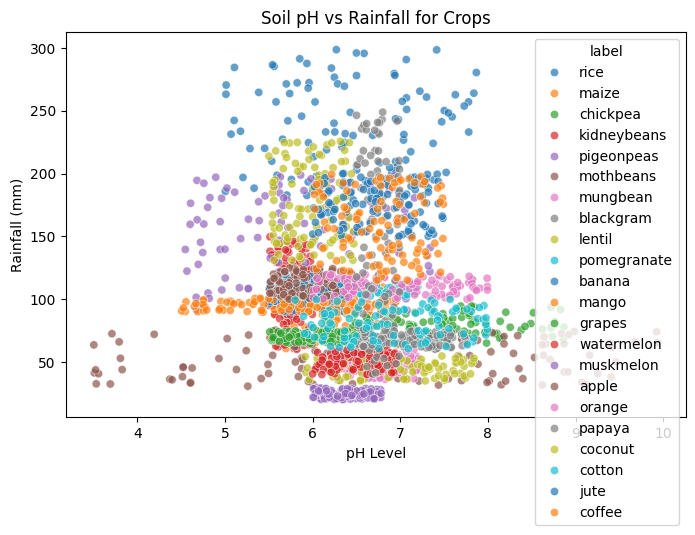

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="ph", y="rainfall", hue="label", data=df, palette="tab10", alpha=0.7)
plt.title("Soil pH vs Rainfall for Crops")
plt.xlabel("pH Level")
plt.ylabel("Rainfall (mm)")
plt.show()

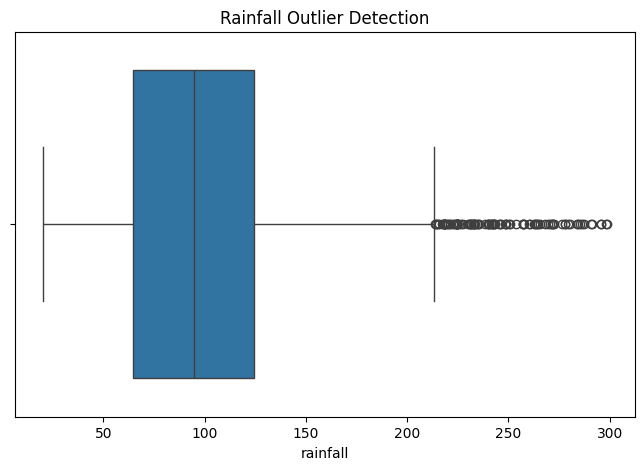

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['rainfall'])
plt.title("Rainfall Outlier Detection")
plt.show()

# Multivariate Analysis

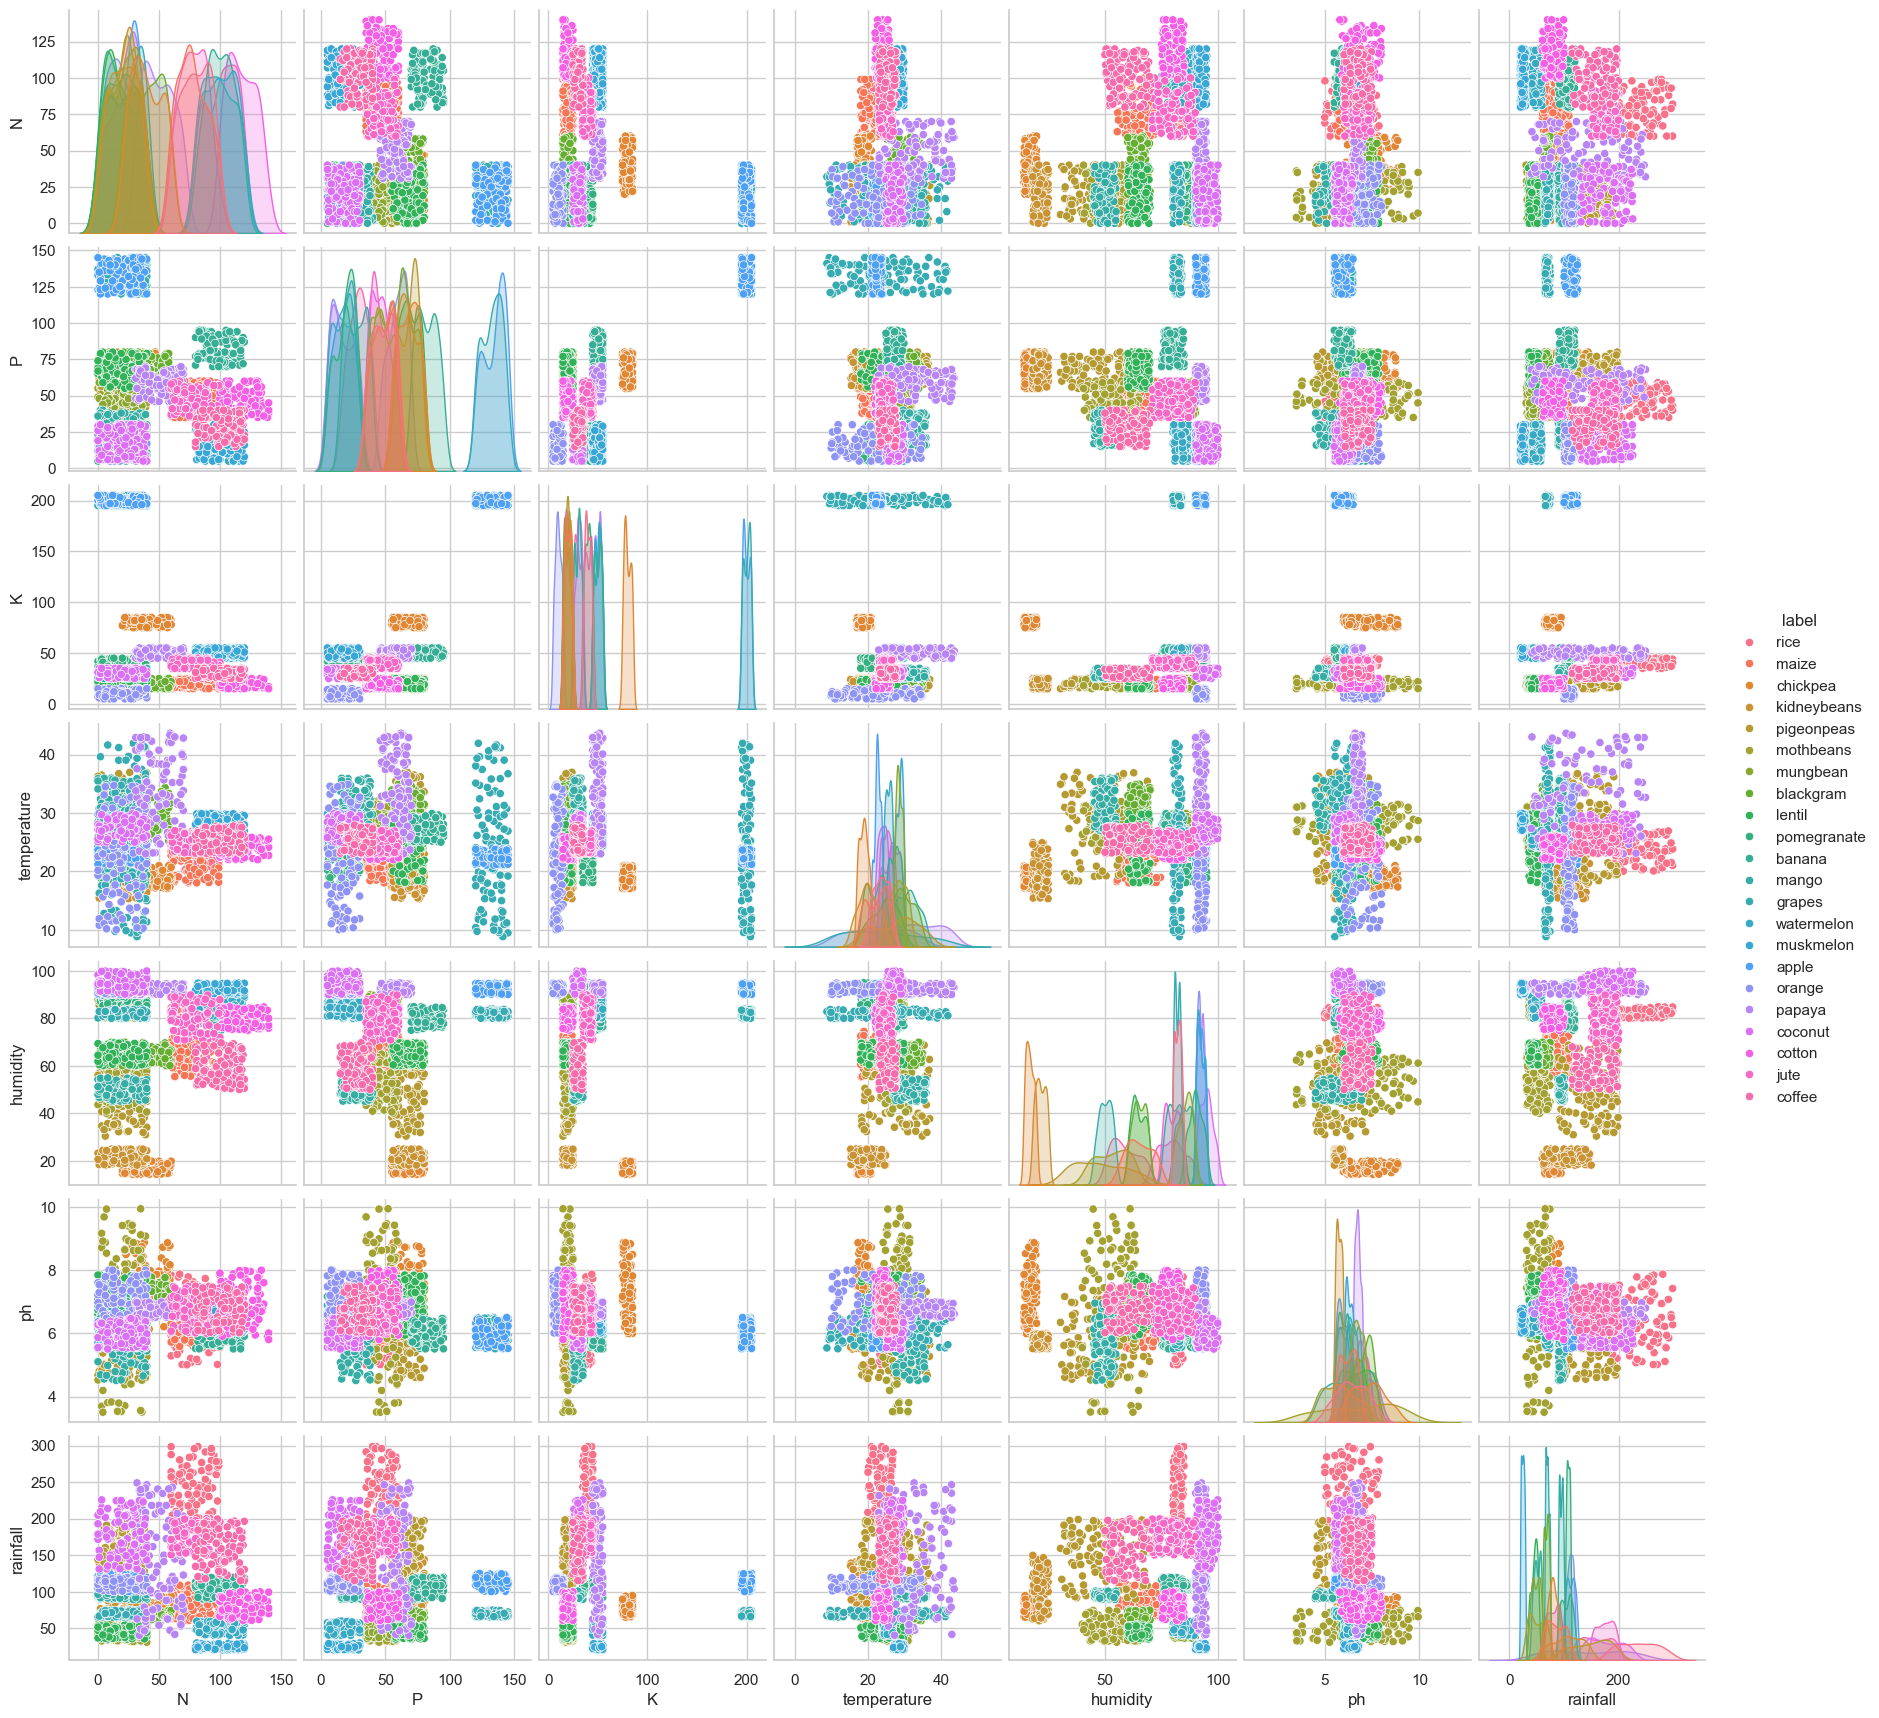

In [44]:
#Multivariate Analysis
sns.pairplot(df[["N","P","K","temperature","humidity","ph","rainfall","label"]], hue="label", diag_kind="kde")
plt.show()

# Correlation Matrix

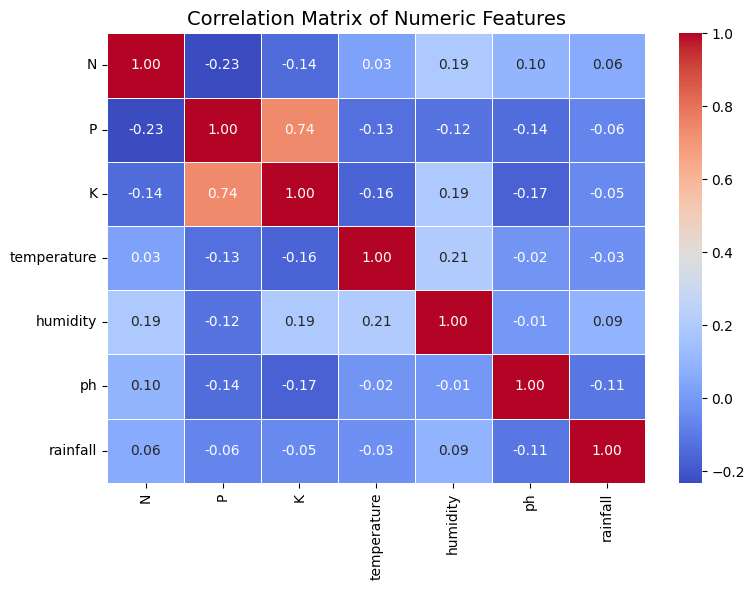

In [17]:
num_features = ["N","P","K","temperature","humidity","ph","rainfall"]

# Correlation matrix
corr = df[num_features].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

# Label Encoding

In [60]:
X = df.drop("label", axis=1)
y = df["label"]

In [61]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [63]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


# Training, Testing Multiple Classifiers

In [15]:
models={
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}
for name,model in models.items():
    
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    print("Name: ", name)
    print(f"{name}  with accuracy : {accuracy_score(Y_test,y_pred)}")
    print("Confusion matrix: \n",confusion_matrix(Y_test, y_pred))
    print("Report: \n", classification_report(Y_test, y_pred))

Name:  Logistic Regression
Logistic Regression  with accuracy : 0.9477272727272728
Confusion matrix: 
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 17  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]


# Selecting Best Model

In [64]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, Y_train)

y_pred = model_RFC.predict(X_test)

print(f"Random Forest with accuracy",accuracy_score(Y_test,y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, y_pred))
print("Classification report: \n", classification_report(Y_test, y_pred))

Random Forest with accuracy 0.9931818181818182
Confusion matrix: 
 [[17  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  

In [65]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


✅ Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00  

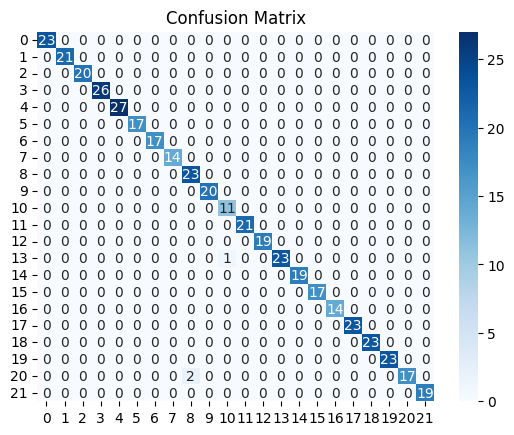

In [66]:
y_pred = rfc.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


# Model

In [67]:
import pickle

In [55]:
pickle.dump(rfc, open("model.pkl", "wb"))
pickle.dump(le, open("label_encoder.pkl", "wb"))
print("✅ Model & Label Encoder Saved Successfully!")

✅ Model & Label Encoder Saved Successfully!


# Load the Model

In [56]:
model = pickle.load(open("model.pkl", "rb"))
label_encoder = pickle.load(open("label_encoder.pkl", "rb"))

# Predictive System

In [71]:
# Sample test cases [N, P, K, temperature, humidity, ph, rainfall]
test_samples = np.array([
    [90, 42, 43, 20.8, 82.0, 6.5, 200.0],   # Rice
    [40, 60, 40, 22.0, 80.0, 6.8, 150.0],   # Maize
    [30, 70, 90, 24.0, 60.0, 6.2, 80.0],    # Cotton
    [100, 50, 50, 18.0, 75.0, 6.0, 220.0],  # Wheat
    [20, 40, 20, 15.0, 65.0, 5.8, 120.0],   # Apple
    [85, 40, 40, 27.0, 85.0, 6.7, 250.0]    # Banana
])

# Convert test_samples to DataFrame with matching feature names
test_samples_df = pd.DataFrame(test_samples, columns=["N","P","K","temperature","humidity","ph","rainfall"])

# Predictions
predictions = model.predict(test_samples_df)
predicted_crops = label_encoder.inverse_transform(predictions)

# Show results in DataFrame
results = test_samples_df.copy()
results["Predicted Crop"] = predicted_crops
results

,N,P,K,temperature,humidity,ph,rainfall,Predicted Crop
0,90.0,42.0,43.0,20.8,82.0,6.5,200.0,rice
1,40.0,60.0,40.0,22.0,80.0,6.8,150.0,papaya
2,30.0,70.0,90.0,24.0,60.0,6.2,80.0,chickpea
3,100.0,50.0,50.0,18.0,75.0,6.0,220.0,rice
4,20.0,40.0,20.0,15.0,65.0,5.8,120.0,pigeonpeas
5,85.0,40.0,40.0,27.0,85.0,6.7,250.0,rice
